In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

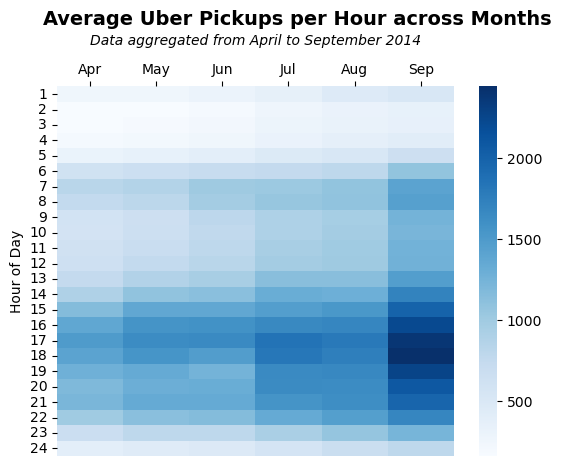

In [ ]:
# List all dataset files in the folder
files = os.listdir(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Uber Case Study\Datasets')

# Select last 8 files and remove unnecessary ones
data_set = files[-8:]
files_to_remove = ['uber-raw-data-janjune-15.csv', 'uber-raw-data-janjune-15_sample.csv']
data_set = [f for f in data_set if f not in files_to_remove]

df_final = pd.DataFrame()
path = r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Uber Case Study\Datasets'

# Load and combine all datasets into a single DataFrame
for file in data_set:
    current_df = pd.read_csv(path + '/' + file)
    df_final = pd.concat([current_df, df_final])

df_final.drop_duplicates(inplace=True)
df_final['Date/Time'] = pd.to_datetime(df_final['Date/Time'])

df_final['day'] = df_final['Date/Time'].dt.day
df_final['hour'] = df_final['Date/Time'].dt.hour
df_final['month_no'] = df_final['Date/Time'].dt.month

# Replace hour 0 with 24 for clarity in plots
df_final.loc[df_final['hour'] == 0, 'hour'] = 24

df_size = (
    df_final
    .groupby(['month_no', 'day', 'hour'])
    .size()
    .reset_index(name='total_trips')
)

df_mean = (
    df_size
    .groupby(['month_no', 'hour'])
    .agg(
        trips_avg=('total_trips', 'mean')
    )
    .reset_index()
)

# Pivot to create month vs. hour matrix of average trips
df_pivot = df_mean.pivot_table(
    index='hour',
    columns='month_no',
    values='trips_avg'
)

# Rename month numbers to month names
df_pivot.columns = pd.to_datetime(df_pivot.columns, format='%m').strftime('%b')

ax = sns.heatmap(data=df_pivot, cmap="Blues")

ax.xaxis.set_ticks_position('top')
ax.set_xlabel('')
ax.set_ylabel('Hour of Day')

plt.suptitle('Average Uber Pickups per Hour across Months', fontsize=14, weight="bold", y=1.04)
plt.title('Data aggregated from April to September 2014', fontsize=10, style="italic", pad=30, loc='center')

plt.show()